In [7]:
import hopsworks
import os
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

project = hopsworks.login(
    project=os.getenv("HOPSWORKS_PROJECT"),
    api_key_value=os.getenv("HOPSWORKS_API_KEY")
)

fs = project.get_feature_store()

fg = fs.get_feature_group(
    name="karachi_air_quality",
    version=2
)

df = fg.read()
# df.head()
display(df)

2026-01-13 18:15:32,199 INFO: Closing external client and cleaning up certificates.
Connection closed.
2026-01-13 18:15:32,211 INFO: Initializing external client
2026-01-13 18:15:32,212 INFO: Base URL: https://c.app.hopsworks.ai:443
2026-01-13 18:15:34,400 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1338526
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.85s) 


,pm2_5,pm10,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,timestamp,event_id,aqi,hour,day,month,weekday,pm2_5_lag1,pm2_5_lag2,pm2_5_roll3
0,72.9,73.6,981.0,16.5,27.4,121.0,2024-12-25 05:00:00+00:00,2024-12-25 05:00:00,200.000000,5,25,12,2,73.6,72.6,73.033333
1,24.7,30.0,372.0,34.7,11.7,20.0,2024-12-29 00:00:00+00:00,2024-12-29 00:00:00,77.497854,0,29,12,6,23.6,27.2,25.166667
2,26.8,45.9,1245.0,41.2,8.1,33.0,2024-11-02 03:00:00+00:00,2024-11-02 03:00:00,81.914163,3,2,11,5,23.3,20.8,23.633333
3,42.8,48.4,1136.0,62.1,19.3,18.0,2024-11-14 17:00:00+00:00,2024-11-14 17:00:00,118.974874,17,14,11,3,43.0,43.9,43.233333
4,27.2,45.2,739.0,62.1,10.3,12.0,2024-10-10 19:00:00+00:00,2024-10-10 19:00:00,82.755365,19,10,10,3,24.2,21.9,24.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,26.7,30.9,974.0,62.7,23.0,24.0,2024-11-28 15:00:00+00:00,2024-11-28 15:00:00,81.703863,15,28,11,3,27.3,26.1,26.700000
2418,22.8,26.2,280.0,5.4,24.1,151.0,2024-11-22 09:00:00+00:00,2024-11-22 09:00:00,73.502146,9,22,11,4,22.4,21.5,22.233333
2419,33.9,41.6,449.0,17.8,9.0,66.0,2024-12-17 19:00:00+00:00,2024-12-17 19:00:00,96.845494,19,17,12,1,35.3,36.0,35.066667
2420,75.7,77.1,666.0,6.5,27.2,115.0,2024-12-25 21:00:00+00:00,2024-12-25 21:00:00,200.000000,21,25,12,2,76.8,77.1,76.533333


In [ ]:
TARGET = "aqi"

FEATURES = [
    "pm2_5",
    "pm10",
    "carbon_monoxide",
    "nitrogen_dioxide",
    "sulphur_dioxide",
    "ozone",
    "hour",
    "day",
    "month",
    "weekday",
    "pm2_5_lag1",
    "pm2_5_lag2",
    "pm2_5_roll3"
]

X = df[FEATURES]
y = df[TARGET]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2422 entries, 0 to 2421
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype                  
---  ------            --------------  -----                  
 0   pm2_5             2422 non-null   float64                
 1   pm10              2422 non-null   float64                
 2   carbon_monoxide   2422 non-null   float64                
 3   nitrogen_dioxide  2422 non-null   float64                
 4   sulphur_dioxide   2422 non-null   float64                
 5   ozone             2422 non-null   float64                
 6   timestamp         2422 non-null   datetime64[us, Etc/UTC]
 7   event_id          2422 non-null   object                 
 8   aqi               2422 non-null   float64                
 9   hour              2422 non-null   int32                  
 10  day               2422 non-null   int32                  
 11  month             2422 non-null   int32                  
 12  weekda

,pm2_5,pm10,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,aqi,hour,day,month,weekday,pm2_5_lag1,pm2_5_lag2,pm2_5_roll3
count,2422.000000,2422.000000,2422.000000,2422.000000,2422.000000,2422.000000,2422.000000,2422.000000,2422.000000,2422.000000,2422.000000,2422.000000,2422.000000,2422.000000
mean,32.215813,46.967176,749.244013,27.587572,16.389472,73.679191,96.741511,11.509083,14.882742,10.109001,2.971924,32.206854,32.196284,32.206317
std,14.498171,21.812540,567.435310,20.974493,9.301776,45.109064,37.677046,6.919234,9.026619,2.956606,1.982794,14.504637,14.510906,14.149467
min,6.900000,6.900000,46.000000,3.000000,3.100000,0.000000,28.750000,0.000000,1.000000,1.000000,0.000000,6.900000,6.900000,8.733333
25%,22.100000,33.900000,345.000000,10.525000,8.300000,38.000000,72.030043,6.000000,7.000000,10.000000,1.000000,22.100000,22.100000,22.400000
50%,28.800000,42.400000,585.500000,22.000000,15.200000,64.000000,86.120172,12.000000,14.000000,11.000000,3.000000,28.800000,28.800000,28.800000
75%,39.600000,54.675000,987.750000,39.275000,22.275000,111.000000,111.095477,17.750000,23.000000,12.000000,5.000000,39.600000,39.600000,39.658333
max,108.700000,217.900000,4302.000000,125.000000,55.300000,207.000000,200.000000,23.000000,31.000000,12.000000,6.000000,108.700000,108.700000,97.700000


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


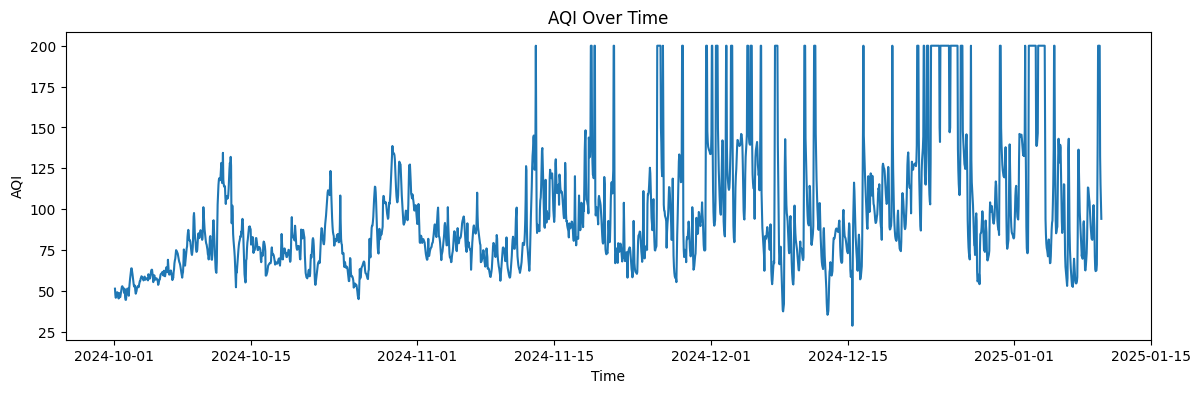

In [ ]:
!pip install sklearn 

In [ ]:
# !pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl (8.9 MB)
  Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gbr.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(model, name):
    preds = model.predict(X_test)
    print(f"\n{name}")
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
    print("R2:", r2_score(y_test, preds))


In [14]:
evaluate(lr, "Linear Regression")
evaluate(rf, "Random Forest")
evaluate(gbr, "Gradient Boosting")



Linear Regression
MAE: 4.387557866044107
RMSE: 7.818355737619842
R2: 0.9539656583170434

Random Forest
MAE: 0.04722195596946015
RMSE: 0.2150719153032478
R2: 0.9999651647855781

Gradient Boosting
MAE: 0.045948620900529945
RMSE: 0.1442690247193466
R2: 0.9999843253708505
